From:
https://zhiyzuo.github.io/VI/

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

class UGMM(object):
    '''Univariate GMM with CAVI'''
    def __init__(self, X, K=2, sigma=1):
        self.X = X
        self.K = K
        self.N = self.X.shape[0]
        self.sigma2 = sigma**2

    def _init(self):
        self.phi = np.random.dirichlet([np.random.random()*np.random.randint(1, 10)]*self.K, self.N)
        self.m = np.random.randint(int(self.X.min()), high=int(self.X.max()), size=self.K).astype(float)
        self.m += self.X.max()*np.random.random(self.K)
        self.s2 = np.ones(self.K) * np.random.random(self.K)
        print('Init mean')
        print(self.m)
        print('Init s2')
        print(self.s2)

    def get_elbo(self):
        t1 = np.log(self.s2) - self.m/self.sigma2
        t1 = t1.sum()
        t2 = -0.5*np.add.outer(self.X**2, self.s2+self.m**2)
        t2 += np.outer(self.X, self.m)
        t2 -= np.log(self.phi)
        t2 *= self.phi
        t2 = t2.sum()
        return t1 + t2

    def fit(self, max_iter=100, tol=1e-10):
        self._init()
        self.elbo_values = [self.get_elbo()]
        self.m_history = [self.m]
        self.s2_history = [self.s2]
        for iter_ in range(1, max_iter+1):
            self._cavi()
            self.m_history.append(self.m)
            self.s2_history.append(self.s2)
            self.elbo_values.append(self.get_elbo())
            if iter_ % 5 == 0:
                print(iter_, self.m_history[iter_])
            if np.abs(self.elbo_values[-2] - self.elbo_values[-1]) <= tol:
                print('ELBO converged with ll %.3f at iteration %d'%(self.elbo_values[-1],
                                                                     iter_))
                break

        if iter_ == max_iter:
            print('ELBO ended with ll %.3f'%(self.elbo_values[-1]))


    def _cavi(self):
        self._update_phi()
        self._update_mu()

    def _update_phi(self):
        t1 = np.outer(self.X, self.m)
        t2 = -(0.5*self.m**2 + 0.5*self.s2)
        exponent = t1 + t2[np.newaxis, :]
        self.phi = np.exp(exponent)
        self.phi = self.phi / self.phi.sum(1)[:, np.newaxis]

    def _update_mu(self):
        self.m = (self.phi*self.X[:, np.newaxis]).sum(0) * (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.m.size == self.K
        #print(self.m)
        self.s2 = (1/self.sigma2 + self.phi.sum(0))**(-1)
        assert self.s2.size == self.K

In [3]:
num_components = 3
mu_arr = np.random.choice(np.arange(-10, 10, 2),
                          num_components) +\
         np.random.random(num_components)
mu_arr

array([-7.15603368,  0.06475753, -9.57479029])

/tmp/ipykernel_2498/1484440893.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:SAMPLE], ax=ax, rug=True)
/tmp/ipykernel_2498/1484440893.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, rug=True)
/tmp/ipykernel_2498/1484440893.py:8: UserWarning: 

`distplot` i

<Axes: ylabel='Density'>

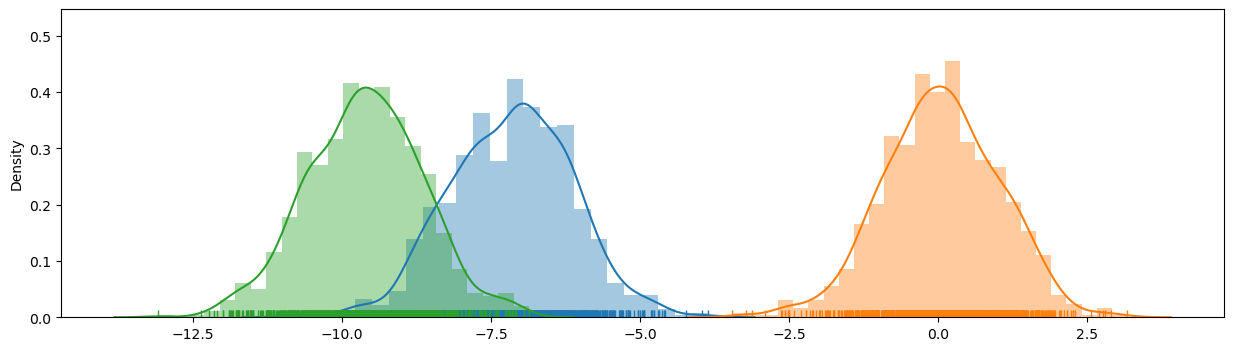

In [4]:
SAMPLE = 1000
X = np.random.normal(loc=mu_arr[0], scale=1, size=SAMPLE)
for i, mu in enumerate(mu_arr[1:]):
    X = np.append(X, np.random.normal(loc=mu, scale=1, size=SAMPLE))
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, rug=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, rug=True)
sns.distplot(X[SAMPLE*2:], ax=ax, rug=True)


In [10]:
ugmm = UGMM(X, 3)
ugmm.fit()


Init mean
[-3.00529131 -4.34087788  3.89444367]
Init s2
[0.21559952 0.16269811 0.08292071]
[0.21559952 0.16269811 0.08292071]
[[-52.31636064 -57.19563236 -55.31747904]
 [-35.08042164 -39.95969336 -38.08154005]
 [-39.1716072  -44.05087892 -42.1727256 ]
 ...
 [-51.01975939 -55.89903111 -54.02087779]
 [-67.65182811 -72.53109983 -70.65294652]
 [-60.44638004 -65.32565176 -63.44749844]]
-72821.53411808127
[-72823.92245453]
[-4.6236877  -9.50295942 -7.62480611]
5 [-0.29373017 -8.38866789  0.35443556]
10 [-0.18309006 -8.38783086  0.24948825]
15 [-0.13612403 -8.38760229  0.20383887]
20 [-0.10846416 -8.38749616  0.17674389]
25 [-0.08961164 -8.38743513  0.15820247]
30 [-0.07564254 -8.38739567  0.14442918]
35 [-0.06471658 -8.38736815  0.13363717]
40 [-0.05584152 -8.38734795  0.12485913]
45 [-0.04842887 -8.38733254  0.1175197 ]
50 [-0.04210446 -8.38732044  0.11125231]
55 [-0.0366174  -8.38731073  0.10581073]
60 [-0.03179222 -8.38730279  0.10102256]
65 [-0.02750199 -8.3872962   0.0967629 ]
70 [-0.02

In [6]:
ugmm.phi.argmax(1)


array([0, 1, 1, ..., 0, 0, 0])

In [7]:
sorted(mu_arr)


[-9.5747902933695, -7.156033681283948, 0.06475753359861258]

In [8]:
sorted(ugmm.m)


[-9.570572221785211, -7.113550791961992, 0.047249757153213834]

/tmp/ipykernel_2498/1556586249.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:SAMPLE], ax=ax, hist=True, norm_hist=True)
/tmp/ipykernel_2498/1556586249.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.normal(ugmm.m[0], 1, SAMPLE), color='k', hist=False, kde=True)
/t

<Axes: ylabel='Density'>

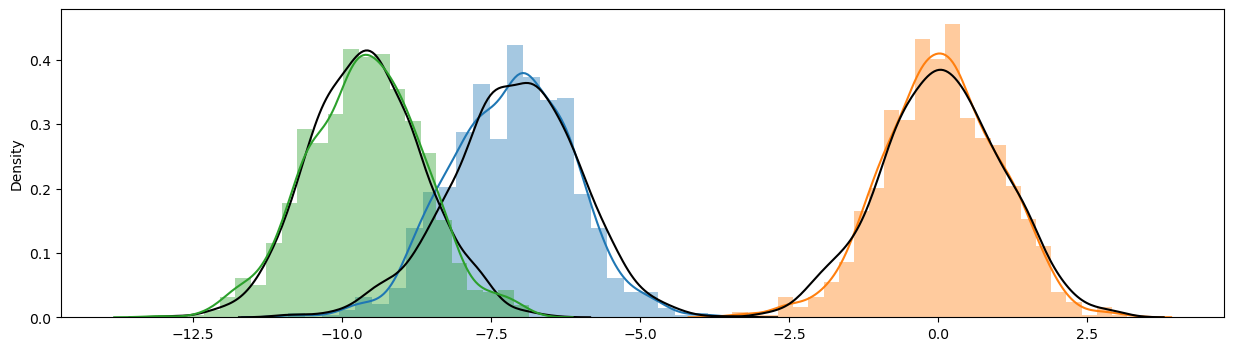

In [9]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.distplot(X[:SAMPLE], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[0], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE:SAMPLE*2], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[1], 1, SAMPLE), color='k', hist=False, kde=True)
sns.distplot(X[SAMPLE*2:], ax=ax, hist=True, norm_hist=True)
sns.distplot(np.random.normal(ugmm.m[2], 1, SAMPLE), color='k', hist=False, kde=True)


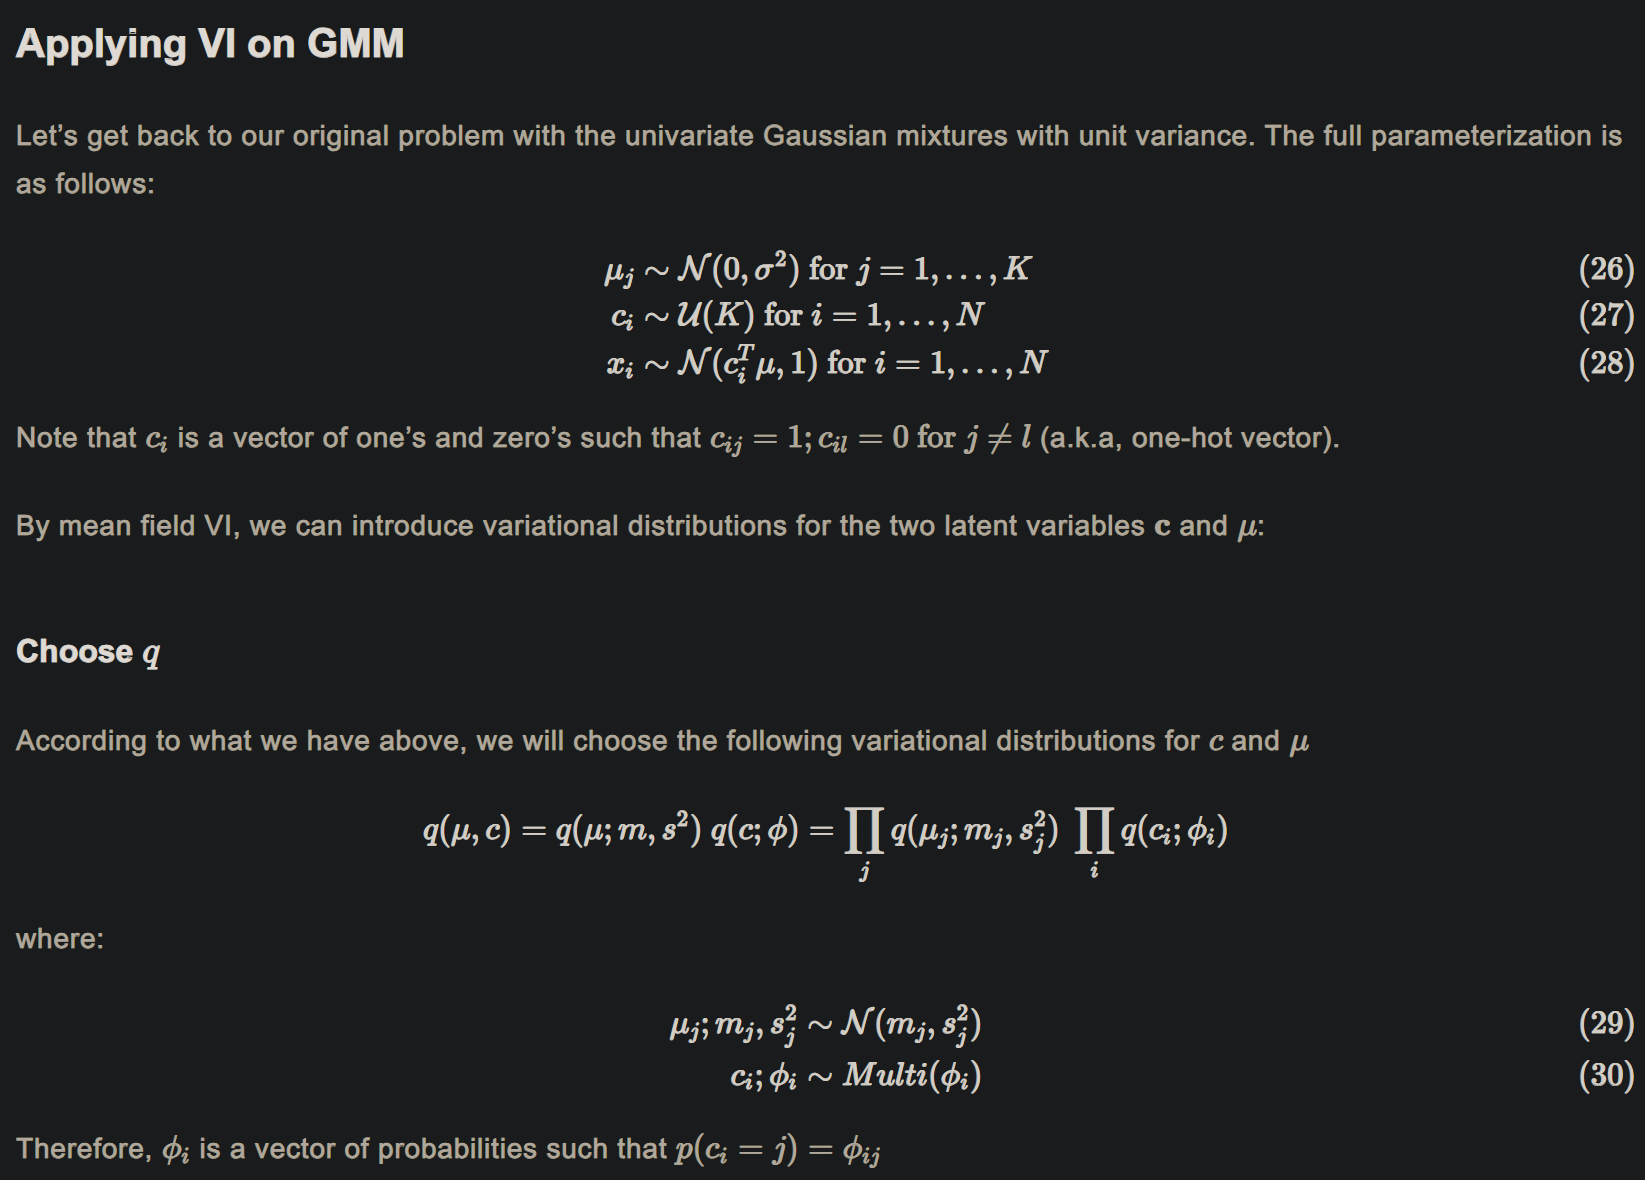

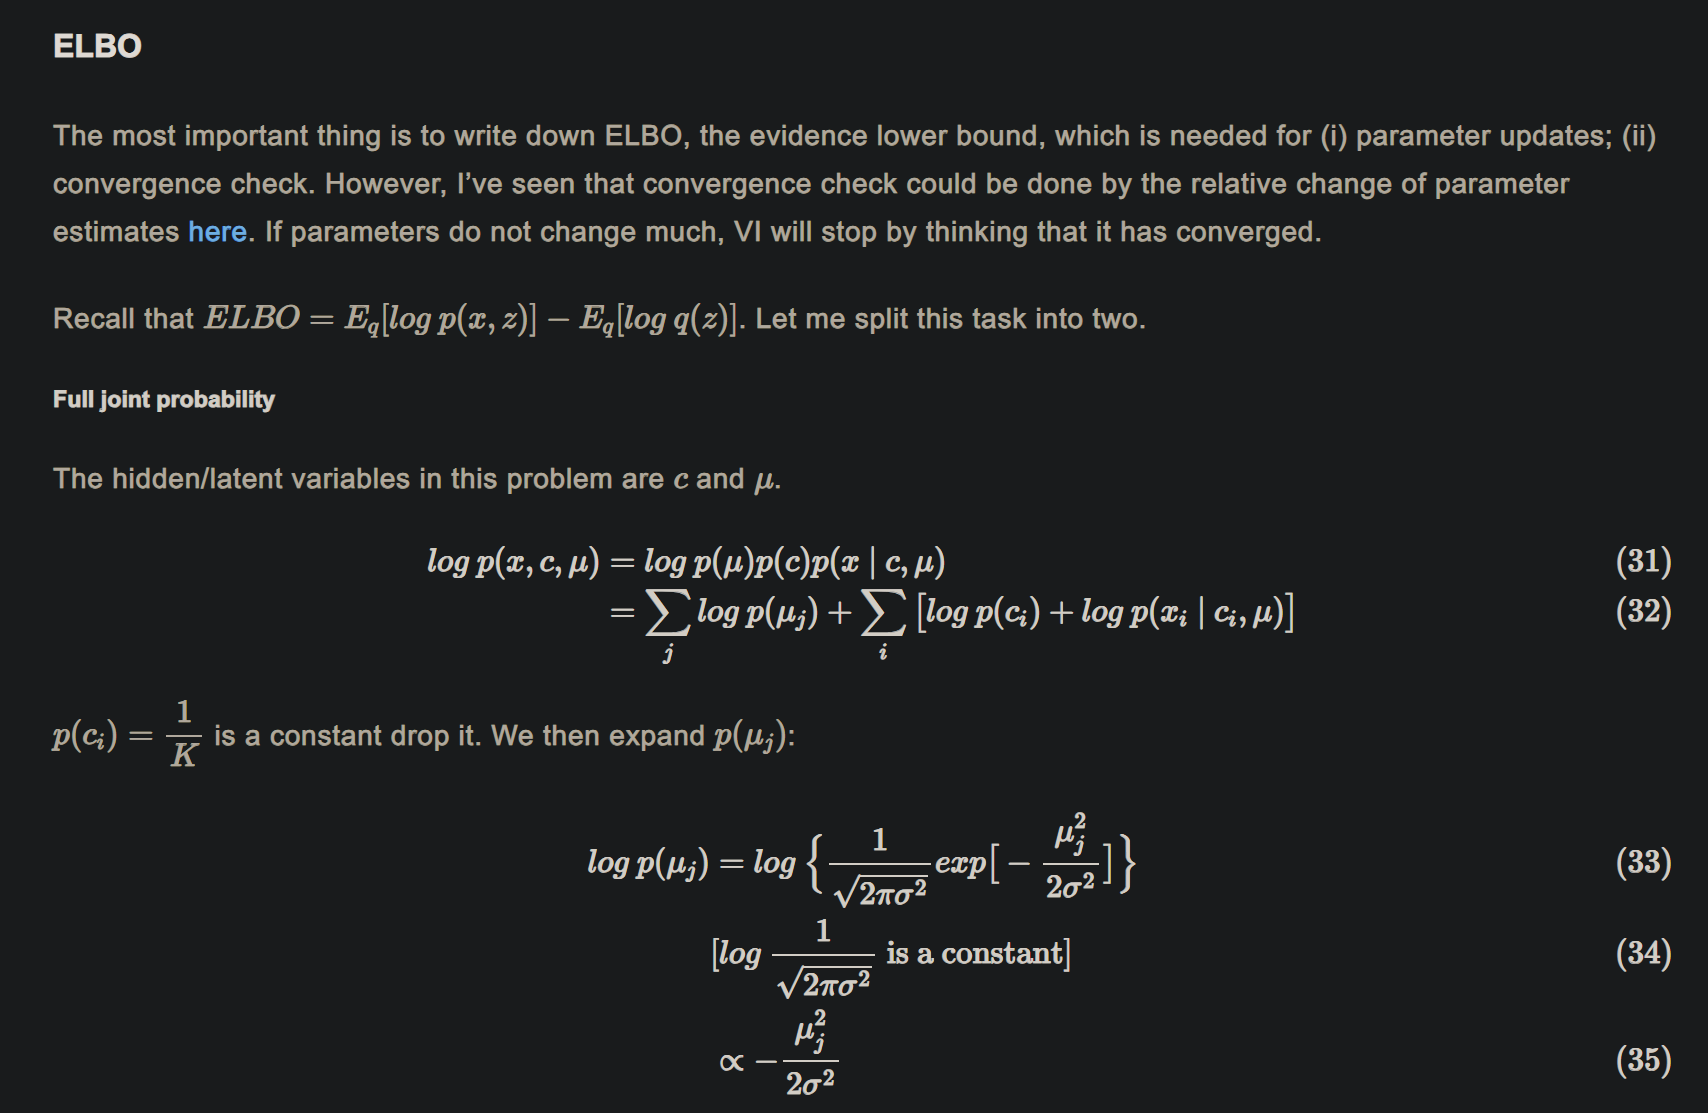

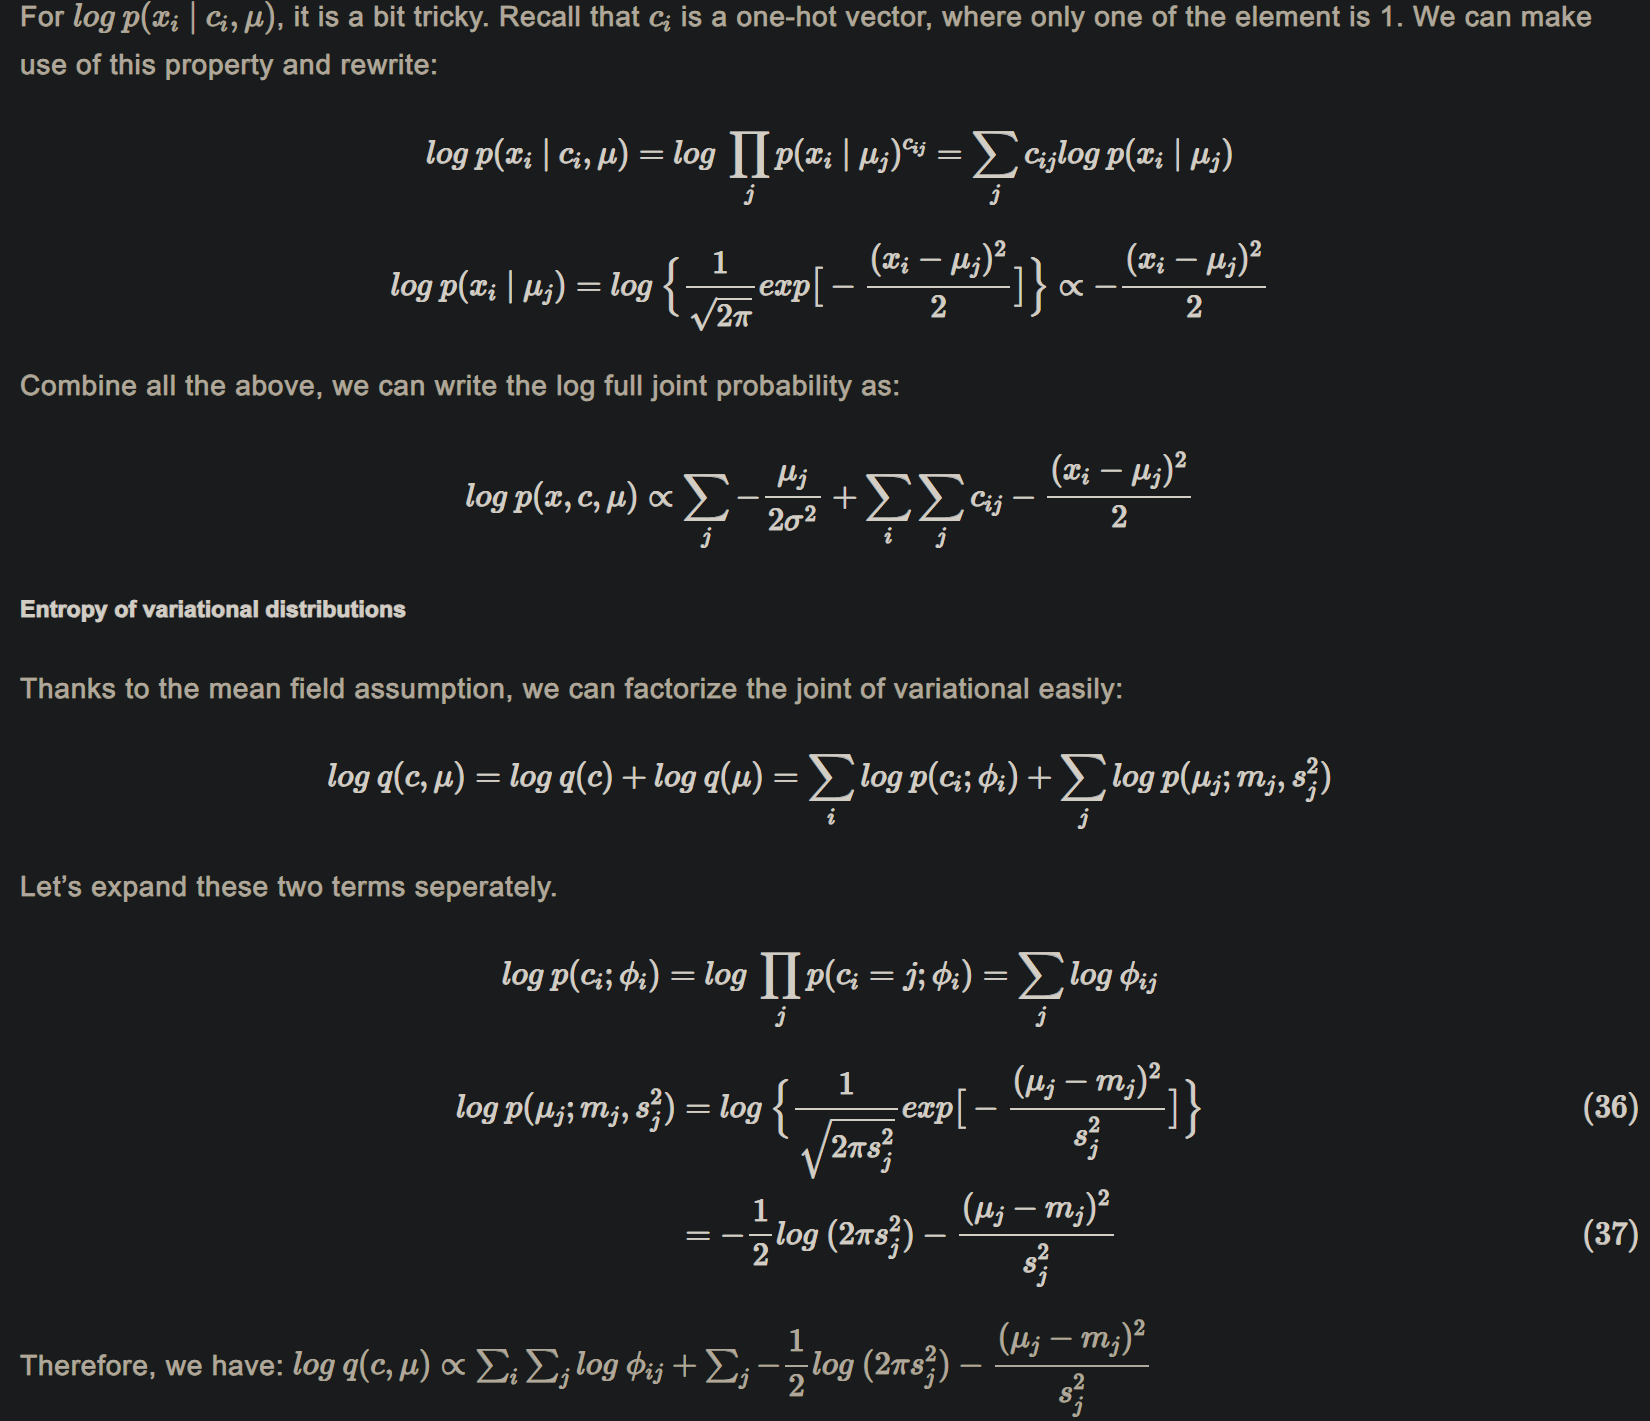

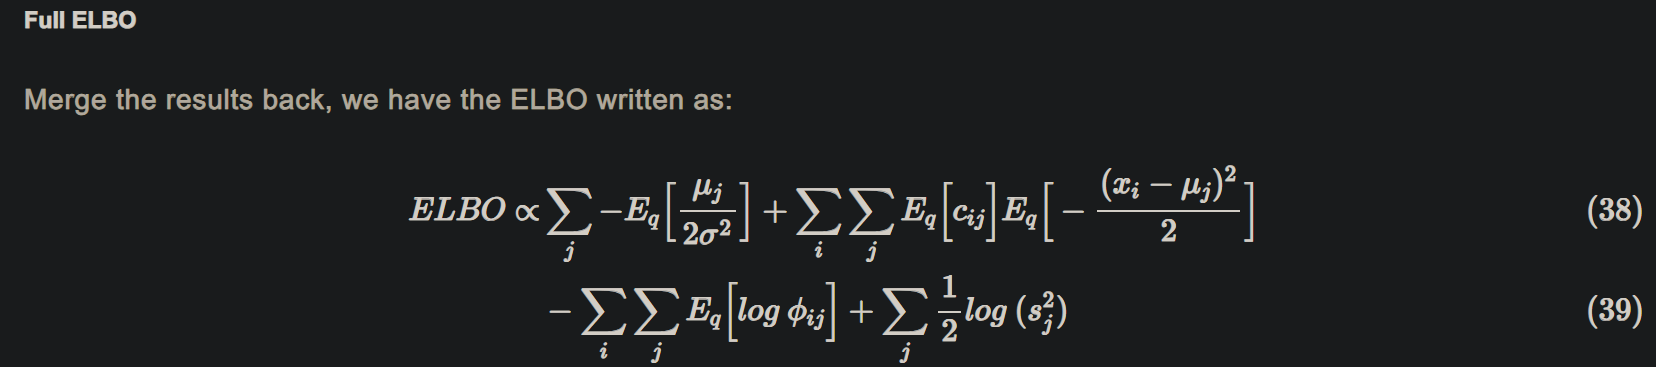

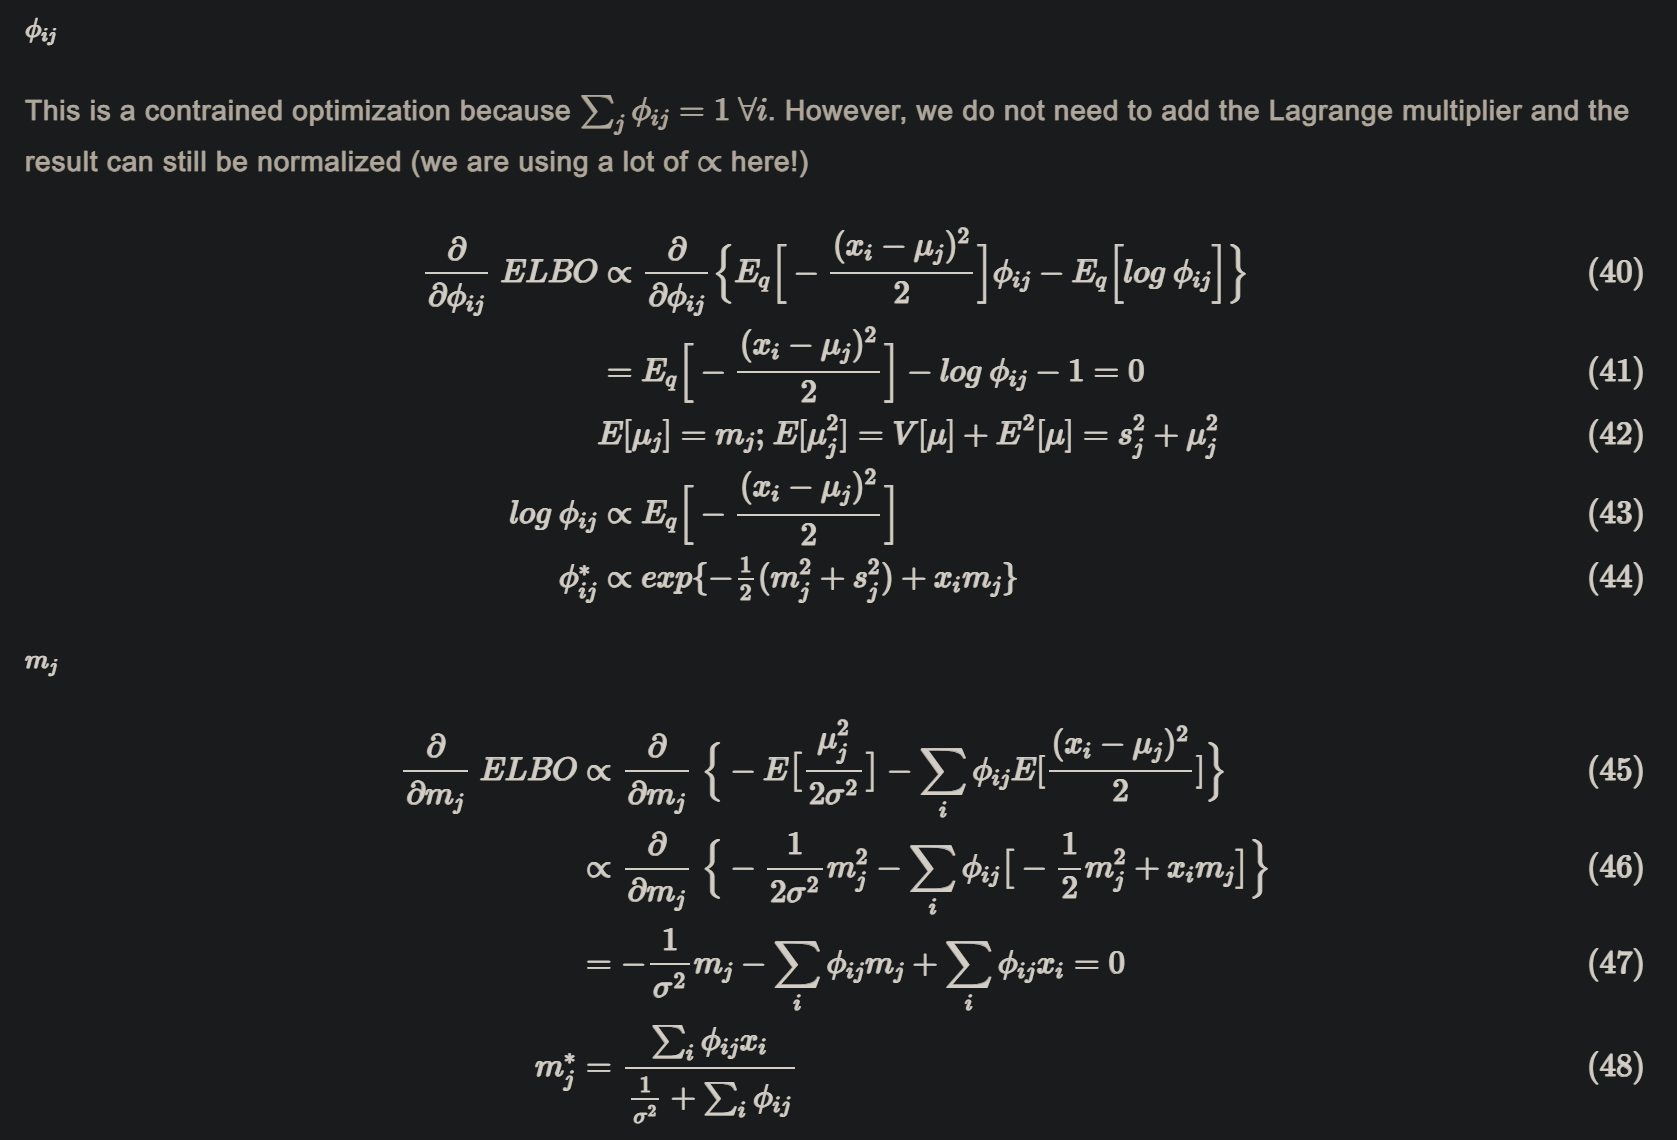

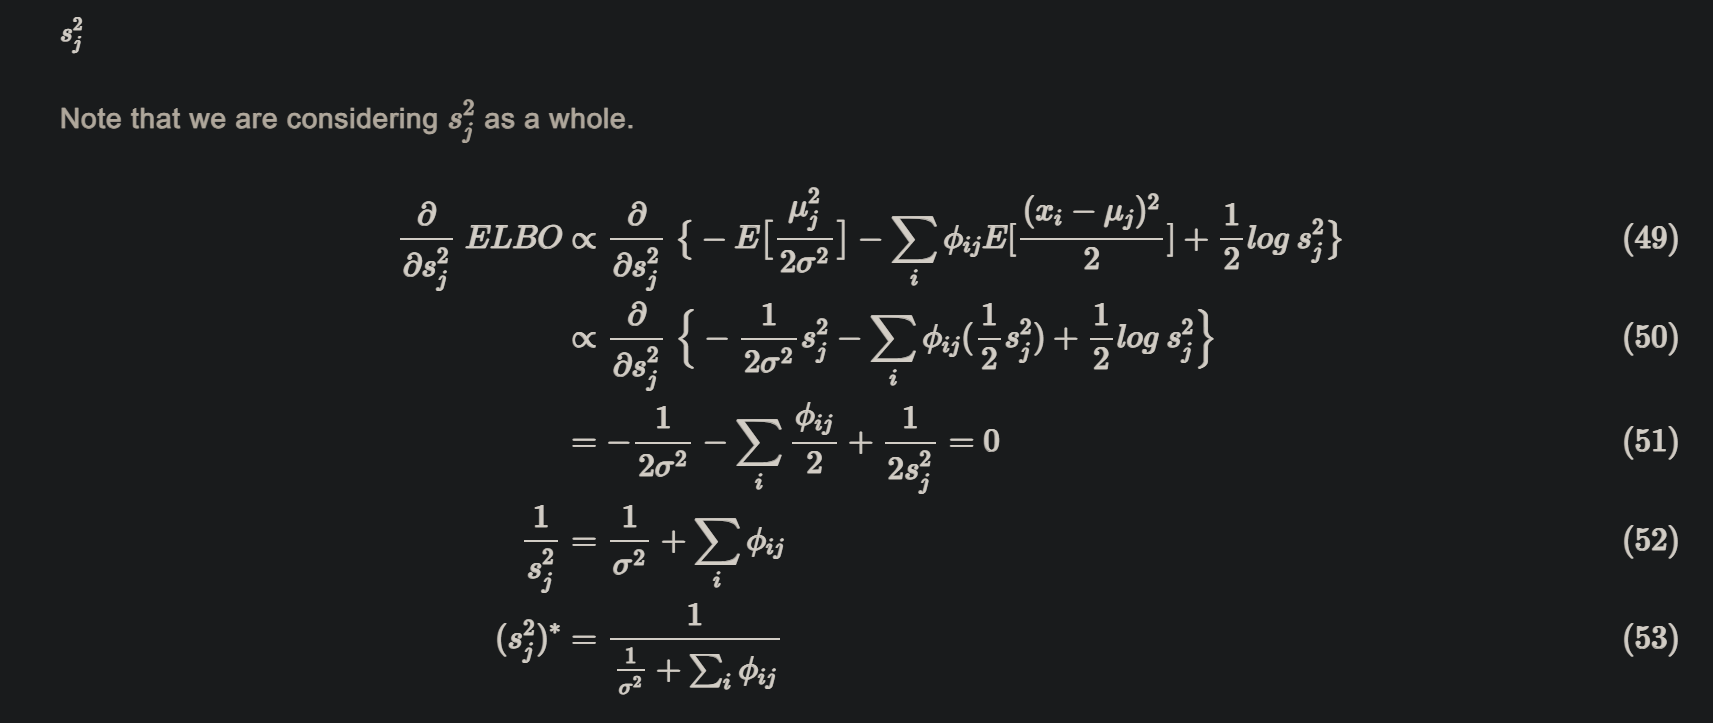